In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
results = []
with open("../serial_collector/collected_data1.csv") as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONE) # change contents to floats
    for row in reader: # each row is a list
        results.append(row)

dataset = results
columns = ['action', 'accelX1', 'accelY1', 'accelZ1', 'gyroX1', 'gyroY1', 'gyroZ1',
           'accelX2', 'accelY2', 'accelZ2', 'gyroX2', 'gyroY2', 'gyroZ2',
           'accelX3', 'accelY3', 'accelZ3', 'gyroX3', 'gyroY3', 'gyroZ3',
           'accelX4', 'accelY4', 'accelZ4', 'gyroX4', 'gyroY4', 'gyroZ4',
           'accelX5', 'accelY5', 'accelZ5', 'gyroX5', 'gyroY5', 'gyroZ5']
data = pd.DataFrame(data = dataset, columns = columns)
data.head()

,action,accelX1,accelY1,accelZ1,gyroX1,gyroY1,gyroZ1,accelX2,accelY2,accelZ2,...,accelZ4,gyroX4,gyroY4,gyroZ4,accelX5,accelY5,accelZ5,gyroX5,gyroY5,gyroZ5
0,fel,2.926488,-0.441078,-1.713436,-73.192886,66.343773,188.981644,0,0,0,...,-5.138318,-35.824715,48.596447,40.759476,8.411429,6.196108,5.790317,28.070290,44.473473,11.749684
1,fel,0.216203,-1.292454,-2.366971,65.628464,65.616844,138.564056,0,0,0,...,0.167808,25.573467,11.763483,-45.573078,0,0,0,0,0,0
2,le,0.216203,-1.292454,-2.366971,65.628464,65.616844,138.564056,0,0,0,...,0.167808,25.573467,11.763483,-45.573078,0,0,0,0,0,0
3,fel,-0.958036,-1.440868,0.126096,65.600006,140.351822,-80.716515,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,fel,-1.316570,-0.630460,2.380210,-20.832790,57.284107,-26.551594,0,0,0,...,0,0,0,0,3.360665,3.440024,5.057559,-14.727086,-26.194059,5.754138


In [4]:
#data.shape => (x, y)
#data has x rows and y columns.
data.shape

(34, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   action   34 non-null     object
 1   accelX1  34 non-null     object
 2   accelY1  34 non-null     object
 3   accelZ1  34 non-null     object
 4   gyroX1   34 non-null     object
 5   gyroY1   34 non-null     object
 6   gyroZ1   34 non-null     object
 7   accelX2  34 non-null     object
 8   accelY2  34 non-null     object
 9   accelZ2  34 non-null     object
 10  gyroX2   34 non-null     object
 11  gyroY2   34 non-null     object
 12  gyroZ2   34 non-null     object
 13  accelX3  34 non-null     object
 14  accelY3  34 non-null     object
 15  accelZ3  34 non-null     object
 16  gyroX3   34 non-null     object
 17  gyroY3   34 non-null     object
 18  gyroZ3   34 non-null     object
 19  accelX4  34 non-null     object
 20  accelY4  34 non-null     object
 21  accelZ4  34 non-null     object
 22  gyro

In [6]:
data.isnull().sum()

action     0
accelX1    0
accelY1    0
accelZ1    0
gyroX1     0
gyroY1     0
gyroZ1     0
accelX2    0
accelY2    0
accelZ2    0
gyroX2     0
gyroY2     0
gyroZ2     0
accelX3    0
accelY3    0
accelZ3    0
gyroX3     0
gyroY3     0
gyroZ3     0
accelX4    0
accelY4    0
accelZ4    0
gyroX4     0
gyroY4     0
gyroZ4     0
accelX5    0
accelY5    0
accelZ5    0
gyroX5     0
gyroY5     0
gyroZ5     0
dtype: int64

In [7]:
#To see the distribution of data we will see the count of each unique activity using value_counts().
data['action'].value_counts()

fel    33
le      1
Name: action, dtype: int64

In [8]:
label = LabelEncoder()
data['label'] = label.fit_transform(data['action'])
data.head()

,action,accelX1,accelY1,accelZ1,gyroX1,gyroY1,gyroZ1,accelX2,accelY2,accelZ2,...,gyroX4,gyroY4,gyroZ4,accelX5,accelY5,accelZ5,gyroX5,gyroY5,gyroZ5,label
0,fel,2.926488,-0.441078,-1.713436,-73.192886,66.343773,188.981644,0,0,0,...,-35.824715,48.596447,40.759476,8.411429,6.196108,5.790317,28.070290,44.473473,11.749684,0
1,fel,0.216203,-1.292454,-2.366971,65.628464,65.616844,138.564056,0,0,0,...,25.573467,11.763483,-45.573078,0,0,0,0,0,0,0
2,le,0.216203,-1.292454,-2.366971,65.628464,65.616844,138.564056,0,0,0,...,25.573467,11.763483,-45.573078,0,0,0,0,0,0,1
3,fel,-0.958036,-1.440868,0.126096,65.600006,140.351822,-80.716515,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,fel,-1.316570,-0.630460,2.380210,-20.832790,57.284107,-26.551594,0,0,0,...,0,0,0,3.360665,3.440024,5.057559,-14.727086,-26.194059,5.754138,0


In [67]:
label.classes_

array(['fel', 'le'], dtype=object)

In [68]:
X = data[['accelX1', 'accelY1', 'accelZ1','gyroX1', 'gyroY1', 'gyroZ1',
          'accelX2', 'accelY2', 'accelZ2','gyroX2', 'gyroY2', 'gyroZ2',
          'accelX3', 'accelY3', 'accelZ3','gyroX3', 'gyroY3', 'gyroZ3',
          'accelX4', 'accelY4', 'accelZ4','gyroX4', 'gyroY4', 'gyroZ4',
          'accelX5', 'accelY5', 'accelZ5','gyroX5', 'gyroY5', 'gyroZ5',]]
y = data['label']

In [69]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['accelX1', 'accelY1', 'accelZ1','gyroX1', 'gyroY1', 'gyroZ1',
          'accelX2', 'accelY2', 'accelZ2','gyroX2', 'gyroY2', 'gyroZ2',
          'accelX3', 'accelY3', 'accelZ3','gyroX3', 'gyroY3', 'gyroZ3',
          'accelX4', 'accelY4', 'accelZ4','gyroX4', 'gyroY4', 'gyroZ4',
          'accelX5', 'accelY5', 'accelZ5','gyroX5', 'gyroY5', 'gyroZ5',])
scaled_X['label'] = y.values

scaled_X

,accelX1,accelY1,accelZ1,gyroX1,gyroY1,gyroZ1,accelX2,accelY2,accelZ2,gyroX2,...,gyroX4,gyroY4,gyroZ4,accelX5,accelY5,accelZ5,gyroX5,gyroY5,gyroZ5,label
0,1.296573,0.515452,-0.208456,-1.888512,0.378297,2.004522,0.0,0.0,0.0,0.0,...,-1.446909,0.828018,1.069877,1.212416,1.157927,0.800673,0.650284,0.404674,0.112240,0
1,0.374491,0.148997,-0.359030,1.830435,0.371311,1.490937,0.0,0.0,0.0,0.0,...,1.166109,0.021694,-0.693912,-1.150492,-0.974905,-1.617597,-0.305887,-0.305800,-0.073337,0
2,0.374491,0.148997,-0.359030,1.830435,0.371311,1.490937,0.0,0.0,0.0,0.0,...,1.166109,0.021694,-0.693912,-1.150492,-0.974905,-1.617597,-0.305887,-0.305800,-0.073337,1
3,-0.025004,0.085116,0.215371,1.829673,1.089540,-0.742790,0.0,0.0,0.0,0.0,...,0.077739,-0.235824,0.237154,-1.150492,-0.974905,-1.617597,-0.305887,-0.305800,-0.073337,0
4,-0.146983,0.433937,0.734716,-0.485814,0.291230,-0.191032,0.0,0.0,0.0,0.0,...,0.077739,-0.235824,0.237154,-0.206427,0.209224,0.494644,-0.807543,-0.724257,0.017545,0
5,0.300935,0.705304,0.186318,0.072285,-0.259290,0.079438,0.0,0.0,0.0,0.0,...,0.562054,0.044112,1.214677,0.934679,0.616050,-0.050110,0.114619,-0.054562,0.865770,0
6,-0.268152,-0.591788,-0.955695,0.466676,-0.866952,1.207505,0.0,0.0,0.0,0.0,...,1.356197,0.056032,0.050125,0.877617,1.374650,0.610403,0.935297,0.928504,0.658324,0
7,-0.116317,0.028465,-0.149325,0.981788,1.265157,-1.002953,0.0,0.0,0.0,0.0,...,-0.145797,0.222783,-0.378968,-1.057061,-1.596804,1.130200,0.604119,0.475276,-1.084007,0
8,0.300935,0.705304,0.186318,0.072285,-0.259290,0.079438,0.0,0.0,0.0,0.0,...,-0.574106,-0.390723,0.037378,-1.150492,-0.974905,-1.617597,-0.305887,-0.305800,-0.073337,0
9,0.300935,0.705304,0.186318,0.072285,-0.259290,0.079438,0.0,0.0,0.0,0.0,...,0.077739,-0.235824,0.237154,-1.150492,-0.974905,-1.617597,-0.305887,-0.305800,-0.073337,0


In [70]:
import scipy.stats as stats

In [77]:
Fs = 2
frame_size = Fs*2 # 80
hop_size = Fs*1 # 40

In [78]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['accelX1'].values[i: i + frame_size]
        y = df['accelY1'].values[i: i + frame_size]
        z = df['accelZ1'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

X, y = get_frames(scaled_X, frame_size, hop_size)

X.shape, y.shape

((15, 4, 3), (15,))

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [83]:
X_train.shape, X_test.shape

((12, 4, 3), (3, 4, 3))

In [86]:
X_train = X_train.reshape(12, 4, 3, 1)
X_test = X_test.reshape(3, 4, 3, 1)

In [87]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

In [88]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 10, validation_data= (X_test, y_test), verbose=1)

Epoch 1/10
1/1 [==============================] - 1s 530ms/step - loss: 1.8905 - accuracy: 0.0000e+00 - val_loss: 1.9144 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 19ms/step - loss: 1.9392 - accuracy: 0.0000e+00 - val_loss: 1.8744 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 21ms/step - loss: 1.9279 - accuracy: 0.0833 - val_loss: 1.8363 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 21ms/step - loss: 1.8433 - accuracy: 0.0000e+00 - val_loss: 1.7999 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 21ms/step - loss: 1.8168 - accuracy: 0.2500 - val_loss: 1.7649 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 21ms/step - loss: 1.7880 - accuracy: 0.3333 - val_loss: 1.7313 - val_accuracy: 0.3333
Epoch 7/10
1/1 [==============================] - 0s 21ms/step - loss: 1.7481 - accuracy: 0.1667 - val_loss: 1.6993 - val_accuracy: 0

In [89]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

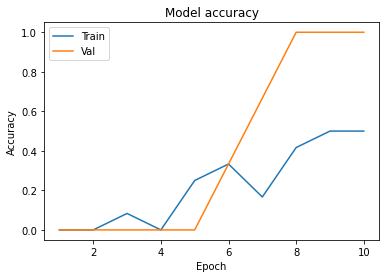

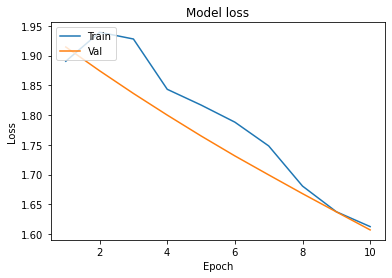

In [93]:
plot_learningCurve(history, 10)

In [214]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 3, 2, 16)          80        
                                                                 
 dropout (Dropout)           (None, 3, 2, 16)          0         
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 1, 32)          2080      
                                                                 
 dropout_1 (Dropout)         (None, 2, 1, 32)          0         
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [94]:
model.save_weights('model.h5')

In [212]:
testX = np.array([
    [2.926488, -0.441078, -1.713436],
    [2.926488, -0.441078, -1.713436],
    [2.926488, -0.441078, -1.713436],
    [0.216203, -1.292454, -2.366971]
]);

testX = tf.expand_dims(testX,0);

In [213]:
Y = model.predict(testX)
print(Y)

1/1 [==============================] - 0s 13ms/step
[[0.21 0.10 0.22 0.18 0.15 0.15]]


In [218]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Nyusssz\AppData\Local\Temp\tmp_l418i5t\assets


INFO:tensorflow:Assets written to: C:\Users\Nyusssz\AppData\Local\Temp\tmp_l418i5t\assets


29824